In [2]:
from models import MeshModel
import jax
from jax.typing import ArrayLike
from models.spots import v_spot
from models import MeshModel, IcosphereModel
import jax.numpy as jnp
from jax.typing import ArrayLike
from models.mesh_transform import add_rotation, evaluate_rotation
from plots import plot_3D, plot_2D
from spectrum import simulate_spectrum, blackbody_intensity
from functools import partial
from models.spots import add_spots

m = IcosphereModel.construct(1000, 1., 1., 1., jnp.concatenate([jnp.array([jnp.log10(7000)]), jnp.ones(19)]))  #__overabundance_spot_params(theta, phi, abun, abun_bg, radius, radius_factor, coord)

In [3]:
# def add_spots(mesh: MeshModel,
#               thetas: ArrayLike,
#               phis: ArrayLike,
#               param_deltas: ArrayLike,
#               radii: ArrayLike,
#               radius_factors: ArrayLike,
#               param_indices: ArrayLike) -> MeshModel:

In [39]:
s = add_spots(mesh=m,
              thetas=jnp.array([1.]),
              phis=jnp.array([0.]),
              param_deltas=jnp.array([0.1]),
              radii=jnp.array([1.5]),
              radius_factors=jnp.array([1.]),
              param_indices=jnp.array([0]))

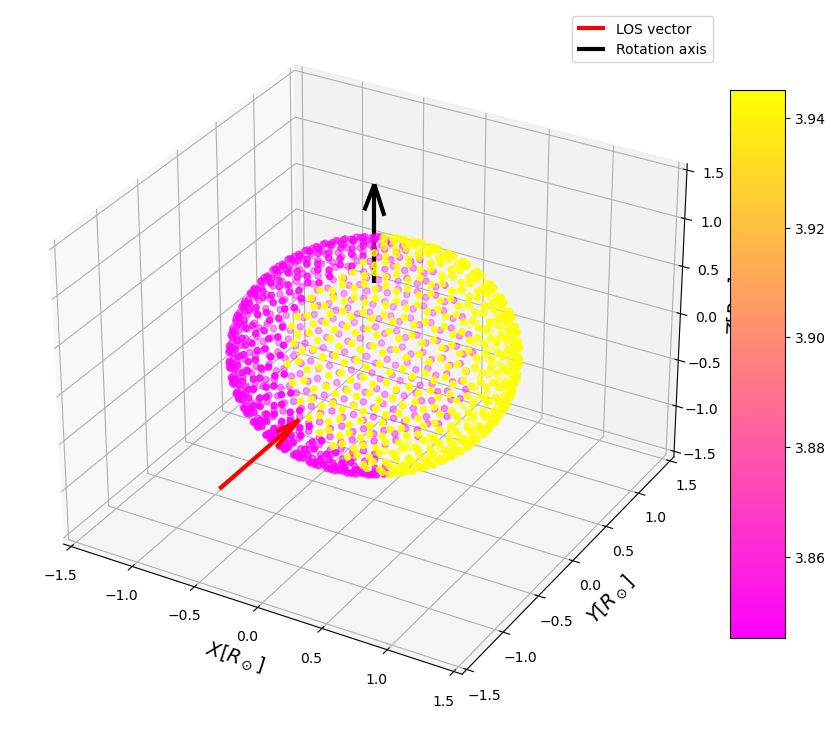

In [40]:
plot_3D(s, 0, cmap='spring')

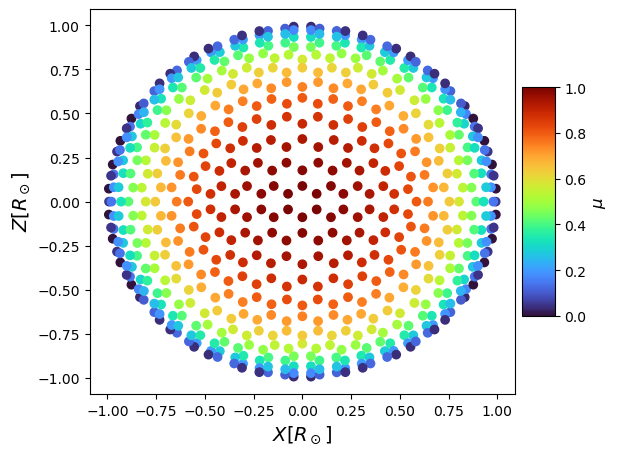

In [41]:
plot_2D(s, 'mus', x_index=0, y_index=2)

In [11]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [8]:
bi = blackbody_intensity(jnp.log10(jnp.linspace(1000., 15000., 100)), 0., [np.log10(7000)])
i = simulate_spectrum(blackbody_intensity, m, jnp.log10(jnp.linspace(1000., 15000., 100)))

In [35]:
wvs = jnp.linspace(0000., 30000., 100)
bi1 = blackbody_intensity(jnp.log10(wvs), 0., [np.log10(3500)])
bi2 = blackbody_intensity(jnp.log10(wvs), 0., [np.log10(3000)])

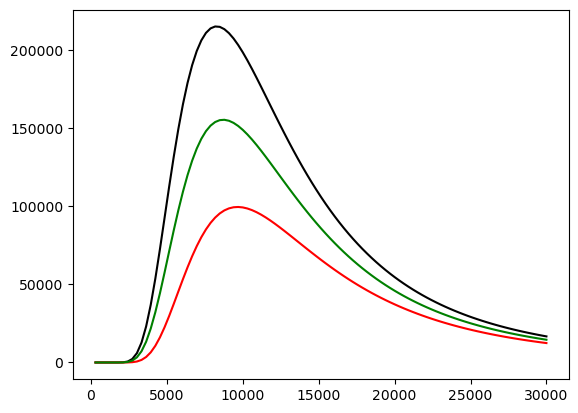

In [37]:
plt.plot(wvs, bi1[0], color='black')
plt.plot(wvs, bi2[0], color='red')
plt.plot(wvs, (bi1[0]+bi2[0])/2, color='green')

Text(0.5, 0, 'Wavelength [$\\AA$]')

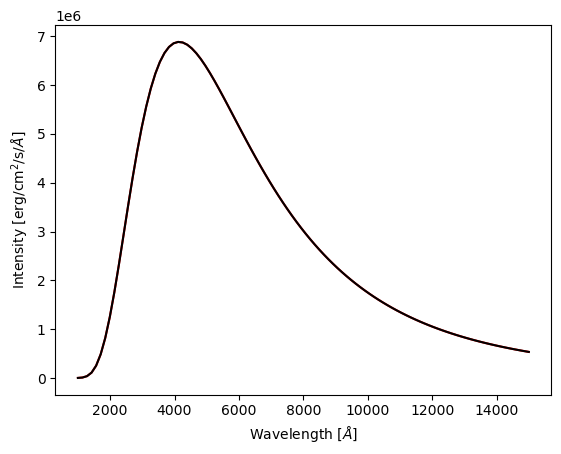

In [29]:
plt.plot(jnp.linspace(1000., 15000., 100), bi[0], color='red');
plt.plot(jnp.linspace(1000., 15000., 100), i[:, 1], color='black');
plt.gca().set_ylabel('Intensity [erg/cm$^2$/s/$\AA$]')
plt.gca().set_xlabel('Wavelength [$\AA$]')

In [30]:
si = simulate_spectrum(blackbody_intensity, s, jnp.log10(jnp.linspace(1000., 15000., 100)))

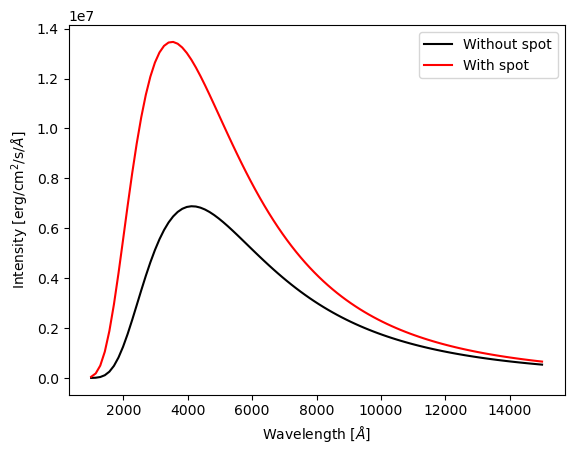

In [31]:
plt.plot(jnp.linspace(1000., 15000., 100), i[:, 1], color='black', label='Without spot');
plt.plot(jnp.linspace(1000., 15000., 100), si[:, 1], color='red', label='With spot');

plt.gca().set_ylabel('Intensity [erg/cm$^2$/s/$\AA$]')
plt.gca().set_xlabel('Wavelength [$\AA$]')
plt.legend();

In [ ]:
# shouldn't it be two peaks for spots?